In [2]:
import keras
import numpy as np
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
from keras.activations import relu, linear, sigmoid, exponential
from keras.regularizers import L2
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import PolynomialFeatures

2023-03-07 14:44:45.355518: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-07 14:44:46.445331: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-07 14:44:46.445420: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-07 14:44:46.445428: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
- age     age in years
- sex
- bmi     body mass index
- bp      average blood pressure
- s1      tc, total serum cholesterol
- s2      ldl, low-density lipoproteins
- s3      hdl, high-density lipoproteins
- s4      tch, total cholesterol / HDL
- s5      ltg, possibly log of serum triglycerides level
- s6      glu, blood sugar level

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499.
(https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [3]:
Diabetes = load_diabetes()
print( Diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [4]:
X = Diabetes.data
y = Diabetes.target
print(f"Shape of X:\n\t{X.shape}\nShape of y:\n\t{y.shape}")

Shape of X:
	(442, 10)
Shape of y:
	(442,)


the mean of target

In [5]:
y_mean = np.mean(y)
y_tmp = y - y_mean
y_tmp = y_tmp * y_tmp
print(y_tmp.mean())

5929.884896910383


# Plot

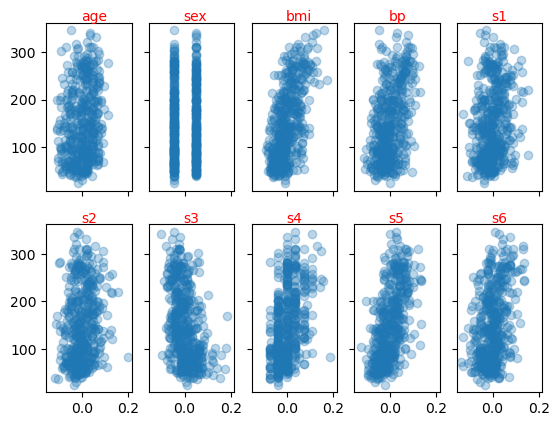

In [6]:
def plot_the_dataset(X, y, feature_names):
    m = 2
    n = 5
    fig, axs = plt.subplots(m,n,sharex=True, sharey=True)
    for i in range(m):
        for j in range(n):
            index = 5*i + j
            axs[i, j].text(-0.005, 366, feature_names[index], c='red')
            axs[i, j].scatter(X[:,index],y,alpha=0.3)

plot_the_dataset(X, y, Diabetes.feature_names)

# Preprocessing

In [7]:
poly = PolynomialFeatures(2)
X = poly.fit_transform(X)
print(X.shape)

(442, 66)


11111# Split the dataset
total: 442
- training set - 360
- validation set - 40
- testing set - 40

In [8]:
X_train = X[:360]
y_train = y[:360]
X_valid = X[360:400]
y_valid = y[360:400]
X_test = X[400:440]
y_test = y[400:440]
print(f"[TRAIN]\n\tX.shape: {X_train.shape}\n\ty.shape: {y_train.shape}")
print(f"[VALID]\n\tX.shape: {X_valid.shape}\n\ty.shape: {y_valid.shape}")
print(f"[TEST]\n\tX.shape: {X_test.shape}\n\ty.shape: {y_test.shape}")

[TRAIN]
	X.shape: (360, 66)
	y.shape: (360,)
[VALID]
	X.shape: (40, 66)
	y.shape: (40,)
[TEST]
	X.shape: (40, 66)
	y.shape: (40,)


# Model

In [9]:
features_amount = X.shape[1]
alpha = 0.001
epochs = 500
model = Sequential([
    keras.Input(shape=(features_amount,)),
    Dense(units=20, activation='sigmoid',kernel_regularizer=L2(0.01)),
    Dense(units=20, activation='relu',kernel_regularizer=L2(0.01)),
    Dense(units=20, activation='relu',kernel_regularizer=L2(0.01)),
    Dense(units=1, activation='linear')
], name='my_model')

model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                1340      
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2,201
Trainable params: 2,201
Non-trainable params: 0
_________________________________________________________________


2023-03-07 14:44:48.517707: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-07 14:44:48.517965: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-03-07 14:44:48.518043: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-03-07 14:44:48.518107: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-03-07 14:44:48.518170: W tensorflow/compile

In [10]:
model.compile(
    loss=keras.losses.MSE,
    optimizer=keras.optimizers.Adam(alpha)
)
history = model.fit(X_train, y_train, epochs=epochs)

Epoch 1/500
12/12 [==============================] - 0s 1ms/step - loss: 28798.6953
Epoch 2/500
12/12 [==============================] - 0s 1ms/step - loss: 28677.8965
Epoch 3/500
12/12 [==============================] - 0s 1ms/step - loss: 28572.5801
Epoch 4/500
12/12 [==============================] - 0s 1ms/step - loss: 28443.5352
Epoch 5/500
12/12 [==============================] - 0s 1ms/step - loss: 28278.8242
Epoch 6/500
12/12 [==============================] - 0s 1ms/step - loss: 28065.9688
Epoch 7/500
12/12 [==============================] - 0s 1ms/step - loss: 27789.1172
Epoch 8/500
12/12 [==============================] - 0s 1ms/step - loss: 27434.6270
Epoch 9/500
12/12 [==============================] - 0s 1ms/step - loss: 26985.0273
Epoch 10/500
12/12 [==============================] - 0s 1ms/step - loss: 26423.9648
Epoch 11/500
12/12 [==============================] - 0s 1ms/step - loss: 25742.4551
Epoch 12/500
12/12 [==============================] - 0s 1ms/step - loss: 

a prediction demo

2/2 [==============================] - 0s 1ms/step


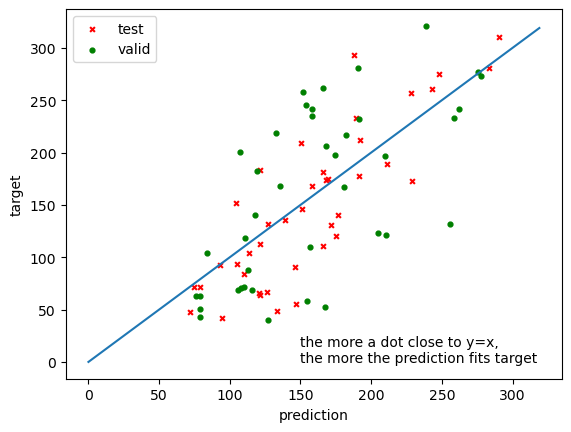

In [11]:
y_demos_test = model.predict(X_test.reshape(-1, features_amount))
y_demos_valid = model.predict(X_valid.reshape(-1, features_amount))
plt.plot(range(320), range(320))
plt.xlabel('prediction')
plt.ylabel('target')
plt.text(150,0,'the more a dot close to y=x,\nthe more the prediction fits target')
plt.scatter(y_demos_test, y_test, marker='x', c='red',s=12, label='test')
plt.scatter(y_demos_valid, y_valid, marker='o', c='green',s=12,label='valid')
plt.legend()
plt.show()

# Plot the loss history

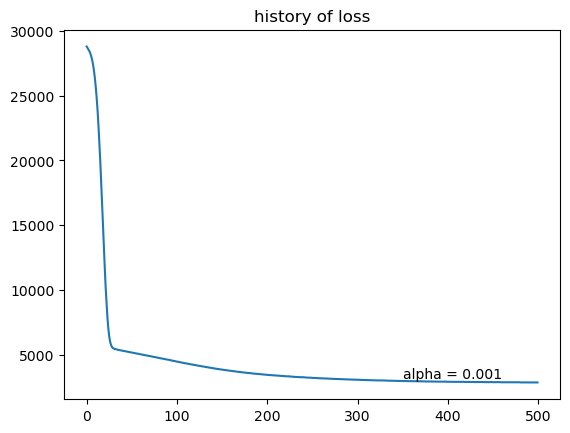

In [12]:
history_loss = history.history['loss']
plt.plot(range(len(history_loss)), history_loss)
plt.title('history of loss')
plt.text(len(history_loss)*0.7, history_loss[-1]+0.01*history_loss[0], f'alpha = {alpha}')
plt.show()

# Calculate the loss on three sets

In [13]:
# loss on training set
prediction = model.predict(X_train)
diff = prediction[:,0] - y_train
loss_train = np.mean(diff * diff)
# loss on validation set
prediction = model.predict(X_valid)
diff = prediction[:,0] - y_valid
loss_valid = np.mean(diff * diff)
# loss on testing set
prediction = model.predict(X_test)
diff = prediction[:,0] - y_test
loss_test = np.mean(diff * diff)
print(f'[TRAIN] loss = {loss_train}\n[VALID] loss = {loss_valid}\n[TEST ] loss = {loss_test}')

2/2 [==============================] - 0s 1ms/step
[TRAIN] loss = 2829.1502227226597
[VALID] loss = 3926.1416206955764
[TEST ] loss = 1773.67350681674


# XGBoost

In [19]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)
# loss on training set
prediction = model.predict(X_train)
diff = prediction - y_train
loss_train = np.mean(diff * diff)
# loss on validation set
prediction = model.predict(X_valid)
diff = prediction - y_valid
loss_valid = np.mean(diff * diff)
# loss on testing set
prediction = model.predict(X_test)
diff = prediction - y_test
loss_test = np.mean(diff * diff)
print(f'[TRAIN] loss = {loss_train}\n[VALID] loss = {loss_valid}\n[TEST ] loss = {loss_test}')

[TRAIN] loss = 4.8226162309422056e-06
[VALID] loss = 4294.168991470327
[TEST ] loss = 3212.264529440018


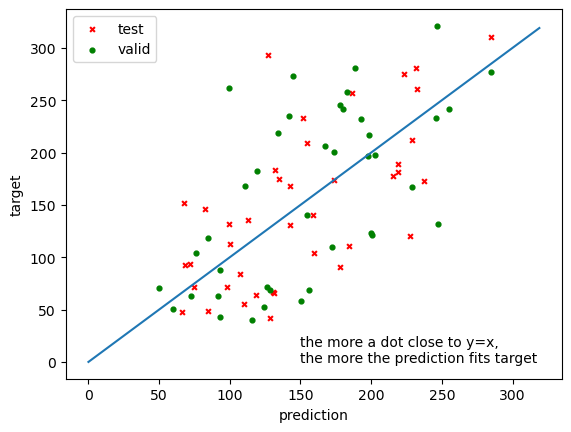

In [20]:
y_demos_test = model.predict(X_test)
y_demos_valid = model.predict(X_valid)
plt.plot(range(320), range(320))
plt.xlabel('prediction')
plt.ylabel('target')
plt.text(150,0,'the more a dot close to y=x,\nthe more the prediction fits target')
plt.scatter(y_demos_test, y_test, marker='x', c='red',s=12, label='test')
plt.scatter(y_demos_valid, y_valid, marker='o', c='green',s=12,label='valid')
plt.legend()
plt.show()